# Predicción de las propiedades de suelo con Regresion lineal multiple

In [2]:
library(sp)
library(raster)
library(MPV)
library(mixlm)
library(stats)
library(sf)

In [3]:
# Cambiar directorio
setwd(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Satelite\Sentinel2\Bandas)")

In [4]:
getwd()

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas"

In [5]:
# Crear lista del directorio
lista_csv <- list.files(path = getwd(), pattern = '.*.csv$')
lista_csv

[1] "Extraccion_indices.csv"    "Variables_correlacion.csv"

In [6]:
dav = read.csv(lista_csv[1], sep = ",")

In [7]:
head(dav)

,ID,pH,CE,MO,N,P,K,Ca,Mg,Al,⋯,S2_47_aspect,S2_48_TPI,S2_49_TRI,S2_50_flowdir,S2_51__ACP_1,S2_52__ACP_2,S2_53__ACP_3,coords.x1,coords.x2,optional
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<lgl>
1,1,4.32,1.20,1.48,0.07,27.91,0.21,0.26,0.02,1.9,⋯,0.00000,0.21780168,0.5321983,64,-0.18855515,0.004775629,-0.007336683,512538,9056311,TRUE
2,2,5.00,0.13,2.29,0.11,2.28,0.18,1.67,0.83,1.1,⋯,313.40308,0.04040952,0.3386931,16,0.19860272,-0.198087066,0.009015589,512126,9057087,TRUE
3,3,4.58,0.16,1.61,0.08,3.68,0.16,0.17,0.04,2.1,⋯,16.81831,-0.33638239,0.6525297,64,-0.06107873,0.034771886,-0.015924960,512766,9056489,TRUE
4,4,4.55,0.10,2.15,0.11,2.92,0.12,1.48,0.39,3.1,⋯,360.00000,0.15719832,0.1571983,64,0.08259204,0.108550020,-0.035339050,513263,9055598,TRUE
5,5,4.71,0.35,2.42,0.12,2.41,0.15,1.67,0.69,3.4,⋯,68.29136,0.06544724,0.5926337,128,-0.15904658,0.050500572,-0.033408940,512480,9056451,TRUE
6,6,5.21,0.17,1.61,0.08,4.57,0.14,1.19,0.37,0.4,⋯,209.31070,-0.03093096,0.7773618,8,-0.18136331,0.041864749,0.016451184,513006,9056074,TRUE


In [8]:
n_max <- ncol(dav) - 1
n_min <- ncol(dav) - 2

In [9]:
xyz = dav[n_min:n_max]
head(xyz,3)

,coords.x1,coords.x2
,<int>,<int>
1,512538,9056311
2,512126,9057087
3,512766,9056489


In [10]:
names(xyz) = c("ESTE", "NORTE")

In [11]:
ncol(dav)

[1] 72

In [12]:
datos_Suelo = dav[,2:16]
head(datos_Suelo,3)

,pH,CE,MO,N,P,K,Ca,Mg,Al,CICe,BT,SAl,Arena,Limo,Arcilla
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.32,1.20,1.48,0.07,27.91,0.21,0.26,0.02,1.9,2.38,0.48,79.69,62.9,16.16,20.94
2,5.00,0.13,2.29,0.11,2.28,0.18,1.67,0.83,1.1,3.77,2.67,29.14,54.9,20.16,24.94
3,4.58,0.16,1.61,0.08,3.68,0.16,0.17,0.04,2.1,2.47,0.37,85.09,62.9,16.16,20.94


In [13]:
name_suelo = names(datos_Suelo)

In [14]:
name_suelo

[1] "pH"      "CE"      "MO"      "N"       "P"       "K"       "Ca"     
 [8] "Mg"      "Al"      "CICe"    "BT"      "SAl"     "Arena"   "Limo"   
[15] "Arcilla"

In [15]:
length(name_suelo)

[1] 15

In [16]:
name_suelo[1]

[1] "pH"

In [17]:
datos_Suelo[[name_suelo[1]]]

[1] 4.32 5.00 4.58 4.55 4.71 5.21 4.66 5.36 4.89 4.57 5.18 4.61 4.24 4.81 4.50
[16] 4.93 4.37 4.70 4.80 5.29 4.72 5.22 4.60 4.84 5.21 4.79 5.20 4.50 5.90 5.60
[31] 5.20 5.00 4.90 5.00 5.30 5.10 5.20 5.10 5.40 4.70 4.30 4.50 4.20 4.40 4.20
[46] 4.40 4.60 4.90 5.10 4.70 4.80 4.70 4.80 4.80 4.80 4.30 4.60 4.50 4.50 4.40

In [18]:
lista_R2 = c()

In [19]:
attach(dav)

In [58]:
names(dav)

[1] "ID"            "pH"            "CE"            "MO"           
 [5] "N"             "P"             "K"             "Ca"           
 [9] "Mg"            "Al"            "CICe"          "BT"           
[13] "SAl"           "Arena"         "Limo"          "Arcilla"      
[17] "S2_01_B1"      "S2_02_B2"      "S2_03_B3"      "S2_04_B4"     
[21] "S2_05_B5"      "S2_06_B6"      "S2_07_B7"      "S2_08_B8"     
[25] "S2_09_B9"      "S2_10_B11"     "S2_11_B12"     "S2_12_NGRDI"  
[29] "S2_13_ExG"     "S2_14_ExR"     "S2_15_ExB"     "S2_16_IKAW"   
[33] "S2_17_GRRI"    "S2_18_ExGR"    "S2_19_GBDI"    "S2_20_MGRVI"  
[37] "S2_21_RGBVI"   "S2_22_VDVI"    "S2_23_VARI"    "S2_24_RGRI"   
[41] "S2_25_NGBDI"   "S2_26_CIVE"    "S2_27_NDVI"    "S2_28_EVI"    
[45] "S2_29_SAVI"    "S2_30_MSAVI"   "S2_31_NDWI"    "S2_32_GNDVI"  
[49] "S2_33_OSAVI"   "S2_34_ARVI"    "S2_35_SIPI"    "S2_36_CGI"    
[53] "S2_37_RVI"     "S2_38_CVI"     "S2_39_CCCI"    "S2_40_RECI"   
[57] "S2_41_SVI"     "S2_42_SSI"     "S2_43_SCI"     "S2_44_SMI"    
[61] "S2_45_MDE"     "S2_46_slope"   "S2_47_aspect"  "S2_48_TPI"    
[65] "S2_49_TRI"     "S2_50_flowdir" "S2_51__ACP_1"  "S2_52__ACP_2" 
[69] "S2_53__ACP_3"  "coords.x1"     "coords.x2"     "optional"

## Se va utilizar los datos seleccionados
Para ello se va extrar los nombres de las bandas.

In [31]:
ubicacion_seleccion = paste(getwd(),"/","Banda_select/",sep = "")
ubicacion_seleccion

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/Banda_select/"

In [51]:
# Crear lista del directorio
texto_select <- list.files(path = ubicacion_seleccion, pattern = '*.tif')
texto_select

[1] "S2_01_B1.tif"      "S2_02_B2.tif"      "S2_04_B4.tif"     
 [4] "S2_05_B5.tif"      "S2_06_B6.tif"      "S2_09_B9.tif"     
 [7] "S2_10_B11.tif"     "S2_11_B12.tif"     "S2_14_ExR.tif"    
[10] "S2_15_ExB.tif"     "S2_16_IKAW.tif"    "S2_19_GBDI.tif"   
[13] "S2_20_MGRVI.tif"   "S2_23_VARI.tif"    "S2_25_NGBDI.tif"  
[16] "S2_26_CIVE.tif"    "S2_30_MSAVI.tif"   "S2_35_SIPI.tif"   
[19] "S2_38_CVI.tif"     "S2_42_SSI.tif"     "S2_43_SCI.tif"    
[22] "S2_45_MDE.tif"     "S2_47_aspect.tif"  "S2_48_TPI.tif"    
[25] "S2_49_TRI.tif"     "S2_50_flowdir.tif" "S2_51__ACP_1.tif" 
[28] "S2_52__ACP_2.tif"  "S2_53__ACP_3.tif"

In [52]:
typeof(texto_select)

[1] "character"

In [54]:
# Separar el texto en partes
partes <- unlist(strsplit(texto_select, "'"))
partes

[1] "S2_01_B1.tif"      "S2_02_B2.tif"      "S2_04_B4.tif"     
 [4] "S2_05_B5.tif"      "S2_06_B6.tif"      "S2_09_B9.tif"     
 [7] "S2_10_B11.tif"     "S2_11_B12.tif"     "S2_14_ExR.tif"    
[10] "S2_15_ExB.tif"     "S2_16_IKAW.tif"    "S2_19_GBDI.tif"   
[13] "S2_20_MGRVI.tif"   "S2_23_VARI.tif"    "S2_25_NGBDI.tif"  
[16] "S2_26_CIVE.tif"    "S2_30_MSAVI.tif"   "S2_35_SIPI.tif"   
[19] "S2_38_CVI.tif"     "S2_42_SSI.tif"     "S2_43_SCI.tif"    
[22] "S2_45_MDE.tif"     "S2_47_aspect.tif"  "S2_48_TPI.tif"    
[25] "S2_49_TRI.tif"     "S2_50_flowdir.tif" "S2_51__ACP_1.tif" 
[28] "S2_52__ACP_2.tif"  "S2_53__ACP_3.tif"

In [55]:
# Filtrar las partes no vacías
partes <- partes[partes != ""]
partes

[1] "S2_01_B1.tif"      "S2_02_B2.tif"      "S2_04_B4.tif"     
 [4] "S2_05_B5.tif"      "S2_06_B6.tif"      "S2_09_B9.tif"     
 [7] "S2_10_B11.tif"     "S2_11_B12.tif"     "S2_14_ExR.tif"    
[10] "S2_15_ExB.tif"     "S2_16_IKAW.tif"    "S2_19_GBDI.tif"   
[13] "S2_20_MGRVI.tif"   "S2_23_VARI.tif"    "S2_25_NGBDI.tif"  
[16] "S2_26_CIVE.tif"    "S2_30_MSAVI.tif"   "S2_35_SIPI.tif"   
[19] "S2_38_CVI.tif"     "S2_42_SSI.tif"     "S2_43_SCI.tif"    
[22] "S2_45_MDE.tif"     "S2_47_aspect.tif"  "S2_48_TPI.tif"    
[25] "S2_49_TRI.tif"     "S2_50_flowdir.tif" "S2_51__ACP_1.tif" 
[28] "S2_52__ACP_2.tif"  "S2_53__ACP_3.tif"

In [56]:
# Eliminar la extensión .tif de cada parte
partes_sin_extension <- sub("\\.tif", "", partes)
partes_sin_extension

[1] "S2_01_B1"      "S2_02_B2"      "S2_04_B4"      "S2_05_B5"     
 [5] "S2_06_B6"      "S2_09_B9"      "S2_10_B11"     "S2_11_B12"    
 [9] "S2_14_ExR"     "S2_15_ExB"     "S2_16_IKAW"    "S2_19_GBDI"   
[13] "S2_20_MGRVI"   "S2_23_VARI"    "S2_25_NGBDI"   "S2_26_CIVE"   
[17] "S2_30_MSAVI"   "S2_35_SIPI"    "S2_38_CVI"     "S2_42_SSI"    
[21] "S2_43_SCI"     "S2_45_MDE"     "S2_47_aspect"  "S2_48_TPI"    
[25] "S2_49_TRI"     "S2_50_flowdir" "S2_51__ACP_1"  "S2_52__ACP_2" 
[29] "S2_53__ACP_3"

In [57]:
# Agregar comas entre las partes
texto_con_comas <- paste(partes_sin_extension, collapse = ", ")
texto_con_comas

[1] "S2_01_B1, S2_02_B2, S2_04_B4, S2_05_B5, S2_06_B6, S2_09_B9, S2_10_B11, S2_11_B12, S2_14_ExR, S2_15_ExB, S2_16_IKAW, S2_19_GBDI, S2_20_MGRVI, S2_23_VARI, S2_25_NGBDI, S2_26_CIVE, S2_30_MSAVI, S2_35_SIPI, S2_38_CVI, S2_42_SSI, S2_43_SCI, S2_45_MDE, S2_47_aspect, S2_48_TPI, S2_49_TRI, S2_50_flowdir, S2_51__ACP_1, S2_52__ACP_2, S2_53__ACP_3"

In [59]:
df_suelo <- data.frame(datos_Suelo[[name_suelo[2]]], S2_01_B1, S2_02_B2, S2_04_B4, S2_05_B5, S2_06_B6, S2_09_B9, S2_10_B11, 
                       S2_11_B12, S2_23_VARI, S2_26_CIVE, S2_14_ExR, S2_15_ExB, S2_16_IKAW, S2_19_GBDI, S2_20_MGRVI, 
                       S2_25_NGBDI, S2_30_MSAVI, S2_35_SIPI, S2_42_SSI, S2_38_CVI, S2_43_SCI, S2_45_MDE, S2_49_TRI, 
                       S2_47_aspect, S2_48_TPI, S2_50_flowdir,S2_51__ACP_1,S2_52__ACP_2,S2_53__ACP_3)
head(df_suelo,4)

,datos_Suelo..name_suelo.2...,S2_01_B1,S2_02_B2,S2_04_B4,S2_05_B5,S2_06_B6,S2_09_B9,S2_10_B11,S2_11_B12,S2_23_VARI,⋯,S2_38_CVI,S2_43_SCI,S2_45_MDE,S2_49_TRI,S2_47_aspect,S2_48_TPI,S2_50_flowdir,S2_51__ACP_1,S2_52__ACP_2,S2_53__ACP_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1.20,0.0290,0.0309,0.0323,0.0885,0.2754,0.3724,0.2159,0.0974,0.34435797,⋯,4.373420,33.91396,217.5808,0.5321983,0.00000,0.21780168,64,-0.18855515,0.004775629,-0.007336683
2,0.13,0.0381,0.0523,0.0782,0.0911,0.1044,0.1621,0.2420,0.2223,-0.19243987,⋯,2.605311,20.74951,219.3033,0.3386931,313.40308,0.04040952,16,0.19860272,-0.198087066,0.009015589
3,0.16,0.0287,0.0434,0.0634,0.1175,0.2559,0.3281,0.2881,0.1637,0.07333333,⋯,3.844110,19.13874,215.5808,0.6525297,16.81831,-0.33638239,64,-0.06107873,0.034771886,-0.015924960
4,0.10,0.0451,0.0608,0.1058,0.1549,0.2278,0.3103,0.3843,0.2645,-0.13639788,⋯,3.853005,13.02195,237.0000,0.1571983,360.00000,0.15719832,64,0.08259204,0.108550020,-0.035339050


In [61]:
for (i in 1:length(name_suelo)) {
    suelo = name_suelo[i]
    dato_suelo = datos_Suelo[[suelo]]
    # Ingreso df Bandas seleccionadas en esta parte actualizar
    df_suelo <- data.frame(dato_suelo, S2_01_B1, S2_02_B2, S2_04_B4, S2_05_B5, S2_06_B6, S2_09_B9, S2_10_B11, 
                           S2_11_B12, S2_23_VARI, S2_26_CIVE, S2_14_ExR, S2_15_ExB, S2_16_IKAW, S2_19_GBDI, S2_20_MGRVI, 
                           S2_25_NGBDI, S2_30_MSAVI, S2_35_SIPI, S2_42_SSI, S2_38_CVI, S2_43_SCI, S2_45_MDE, S2_49_TRI, 
                           S2_47_aspect, S2_48_TPI, S2_50_flowdir,S2_51__ACP_1,S2_52__ACP_2,S2_53__ACP_3)
    # Modelo de regresion lineal, el cero es sin intersecto
    full.model_pH_0 <- lm(dato_suelo ~  0 +., data=df_suelo)
    full.model_pH <- lm(dato_suelo ~  ., data=df_suelo)
    # Sumary
    sum_modelo_0 = summary(full.model_pH_0)
    sum_modelo = summary(full.model_pH)
    # R2
    R_O = sum_modelo_0$adj.r.squared
    R = sum_modelo$adj.r.squared
    # Función utilizando condiciones
    if (R_O > R) {
        full.modelo = full.model_pH_0
        lista_R2[i] = R_O
        print(paste("Se va utilizar el R2 R_O > R: ", round(R_O, 3)))
    } else if (R_O == R){
        full.modelo = full.model_pH_0 
        lista_R2[i] = R_O
        print(paste("Se va utilizar el R2 R_O == R: ", round(R_O, 3)))
    } else {
        full.modelo = full.model_pH
        lista_R2[i] = R
        print(paste("Se va utilizar el R2 R_O < R: ", round(R, 3)))
    }
    # Realizar el modelo
    modelo_x = summary(backward(full.modelo, alpha=0.05))
    # Seleccion de residual
    lista_residuales = modelo_x$residuals
    xy_residuales = data.frame(xyz, lista_residuales)
    # conversion a shapefile
    coordinates(xy_residuales) <- ~ESTE + NORTE
    proj4string(xy_residuales) = CRS("+init=epsg:32718")
    xy_residuales_sf = st_as_sf(xy_residuales)
    carpeta_shp = paste(getwd(),"/","SHP",sep = "")
    if (!dir.exists(carpeta_shp)){
        dir.create(carpeta_shp)
    }else{
        print("Directorio existe SHP")
    }
    st_write(xy_residuales_sf, paste(carpeta_shp,"/SHP_Residuales_",suelo,".shp",sep = ""))
    # Convertir dataframe
    DT_modelo = data.frame(modelo_x$coefficients)
    carpeta_Prediccion = paste(getwd(),"/","Prediccion",sep = "")
    if (!dir.exists(carpeta_Prediccion)){
        dir.create(carpeta_Prediccion)
    }else{
        print("Directorio existe Prediccion")
    }
    write.csv(DT_modelo, file=paste(carpeta_Prediccion,"/Modelo_prediccion_",suelo,".csv",sep = ""))    
}

[1] "Se va utilizar el R2 R_O > R:  0.997"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS     AIC    R2pred      Cp F value Pr(>F)
S2_30_MSAVI      1 2.2120 -144.03 -0.055795 27.0019  0.0020 0.9648
S2_23_VARI       2 2.2149 -145.95  0.040002 25.0414  0.0420 0.8389
S2_50_flowdir    3 2.2192 -147.83  0.107137 23.1029  0.0674 0.7968
S2_38_CVI        4 2.2271 -149.62  0.166898 21.2124  0.1232 0.7277
S2_09_B9         5 2.2324 -151.48  0.226443 19.2877  0.0869 0.7698
S2_47_aspect     6 2.2392 -153.29  0.259955 17.3829  0.1125 0.7392
S2_43_SCI       

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_pH' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_pH.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Se va utilizar el R2 R_O > R:  0.603"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS     AIC     R2pred       Cp F value  Pr(>F)  
S2_42_SSI        1 44.694 36.3302 -0.7842636 27.00009  0.0001 0.99231  
S2_25_NGBDI      2 44.707 34.3471 -0.5793780 25.00881  0.0093 0.92385  
S2

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_CE' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_CE.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.864"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS    AIC    R2pred     Cp F value  Pr(>F)  
S2_47_aspect     1 34.126 20.143 -0.303005 27.000  0.0003 0.98720  
S2_10_B11        2 34.162 18.206 -0.225494 25.0

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_MO' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_MO.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.887"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step      RSS     AIC    R2pred     Cp F value Pr(>F)
S2_10_B11        1 0.050718 -370.55 -0.345599 27.002  0.0018 0.9664
S2_47_aspect     2 0.050721 -372.55 -0.274587 2

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_N' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_N.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.618"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step     RSS    AIC     R2pred     Cp F value  Pr(>F)  
S2_23_VARI       1  809.47 210.12 -0.2106600 27.019  0.0193 0.89035  
S2_35_SIPI       2  811.58 208.28 -0.1380805 

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_P' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_P.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.57"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS      AIC     R2pred       Cp F value  Pr(>F)  
S2_38_CVI        1 5.2845  -91.774 -0.4936033 27.00090  0.0009 0.97586  
S2_50_flowdir    2 5.2862  -93.754 -0.42

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_K' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_K.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.872"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS     AIC    R2pred      Cp F value Pr(>F)
S2_50_flowdir    1 15.147 -28.594 -0.178330 27.0502  0.0518 0.8214
S2_38_CVI        2 15.189 -30.426 -0.100321 25.1376

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_Ca' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_Ca.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.34"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1



Warning message in max(F.removed, na.rm = TRUE):
"ningun argumento finito para max; retornando -Inf"


              Step    RSS     AIC   R2pred       Cp F value Pr(>F)
S2_02_B2         1 2.3030 -141.61 -1.95527 27.00005  0.0001 0.9943
S2_23_VARI       2 2.3038 -143.59 -1.61250 25.01096  0.0116 0.9148
S2_50_flowdir    3 2.3125 -145.36 -1.44183 23.12767  0.1280 0.7228
S2_43_SCI        4 2.3547 -146.28 -1.16588 21.69563  0.6386 0.4296
S2_49_TRI        5 2.4171 -146.71 -1.01685 20.53649  0.9550 0.3350
S2_47_aspect     6 2.4824 -147.11 -1.02518 19.41466  0.9986 0.3241
S2_42_SSI        7 2.5505 -147.48 -0.90141 18.33174  1.0429 0.3136
S2_20_MGRVI      8 2.5838 -148.70 -0.75110 16.78021  0.5094 0.4796
S2_16_IKAW       9 2.6137 -150.01 -0.73322 15.18268  0.4629 0.5002
S2_30_MSAVI     10 2.6421 -151.37 -0.50717 13.56522  0.4458 0.5081
S2_25_NGBDI     11 2.6741 -152.64 -0.36446 11.99501  0.5075 0.4801
S2_10_B11       12 2.7611 -152.72 -0.38061 11.16594  1.3988 0.2434
S2_01_B1        13 2.7626 -154.69 -0.34153  9.18649  0.0243 0.8767
S2_06_B6        14 2.7633 -156.68 -0.22043  7.19587  0.0113 0.

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_Mg' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_Mg.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.721"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS    AIC    R2pred       Cp F value Pr(>F)  
S2_49_TRI        1 45.572 37.497 -0.728003 27.01356  0.0140 0.9066  
S2_38_CVI        2 45.593 35.524 -0.577907 25

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_Al' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_Al.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.906"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS    AIC     R2pred      Cp F value  Pr(>F)  
S2_38_CVI        1 68.799 62.211 -0.6846815 27.0021  0.0021 0.96341  
S2_16_IKAW       2 68.841 60.247 -0.5384581

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_CICe' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_CICe.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.863"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS     AIC    R2pred     Cp F value  Pr(>F)  
S2_43_SCI        1 31.265 14.8895 -0.202375 27.005  0.0047 0.94603  
S2_23_VARI       2 31.290 12.9380 -0.1064

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_BT' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_BT.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.828"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step   RSS    AIC     R2pred      Cp F value  Pr(>F)  
S2_38_CVI        1 11838 371.08 -0.5311810 27.0057  0.0059 0.93932  
S2_50_flowdir    2 11858 369.19 -0.4693945 25

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_SAl' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_SAl.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.96"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS    AIC      R2pred      Cp F value  Pr(>F)  
S2_35_SIPI       1 4484.5 312.84 -0.83053328 27.0001  0.0001 0.99214  
S2_23_VARI       2 4484.5 310.84 -0.5715

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_Arena' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_Arena.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.896"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

             Step    RSS    AIC    R2pred     Cp F value Pr(>F)
S2_23_VARI      1 1528.0 248.24 -0.761718 27.002  0.0020 0.9646
S2_45_MDE       2 1528.5 246.26 -0.685662 25.012 

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_Limo' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_Limo.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"
[1] "Se va utilizar el R2 R_O > R:  0.899"
Backward elimination, alpha-to-remove: 0.05

Full model: dato_suelo ~ S2_01_B1 + S2_02_B2 + S2_04_B4 + S2_05_B5 + S2_06_B6 + 
    S2_09_B9 + S2_10_B11 + S2_11_B12 + S2_23_VARI + S2_26_CIVE + 
    S2_14_ExR + S2_15_ExB + S2_16_IKAW + S2_19_GBDI + S2_20_MGRVI + 
    S2_25_NGBDI + S2_30_MSAVI + S2_35_SIPI + S2_42_SSI + S2_38_CVI + 
    S2_43_SCI + S2_45_MDE + S2_49_TRI + S2_47_aspect + S2_48_TPI + 
    S2_50_flowdir + S2_51__ACP_1 + S2_52__ACP_2 + S2_53__ACP_3 - 
    1

              Step    RSS    AIC    R2pred      Cp F value  Pr(>F)  
S2_23_VARI       1 1861.6 260.09 -0.694295 27.0004  0.0004 0.98449  
S2_43_SCI        2 1861.8 258.10 -0.58206

Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `SHP_Residuales_Arcilla' to data source 
  `C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/SHP/SHP_Residuales_Arcilla.shp' using driver `ESRI Shapefile'
Writing 60 features with 1 fields and geometry type Point.
[1] "Directorio existe Prediccion"


In [62]:
lista_R2

[1] 0.9970222 0.6030746 0.8642666 0.8869440 0.6175319 0.5695060 0.8719199
 [8] 0.3396079 0.7205081 0.9064980 0.8627278 0.8284767 0.9595108 0.8964218
[15] 0.8988983

In [63]:
# Generar dataframe de R2
DF_R2 = data.frame(name_suelo, lista_R2)

In [64]:
names(DF_R2) = c("Variable suelo", "R2 Ajustado")

## Crear carpeta prediccion y shapefile

In [65]:
carpeta_Prediccion = paste(getwd(),"/","Prediccion",sep = "")
    if (!dir.exists(carpeta_Prediccion)){
        dir.create(carpeta_Prediccion)
    }else{
        print("Directorio existe PREDICCION")
    }

[1] "Directorio existe PREDICCION"


In [66]:
carpeta_SHP = paste(getwd(),"/","SHP",sep = "")
    if (!dir.exists(carpeta_SHP)){
        dir.create(carpeta_SHP)
    }else{
        print("Directorio existe SHP")
    }

[1] "Directorio existe SHP"


In [67]:
write.csv(DF_R2, paste(carpeta_Prediccion,"/Tabla_R2_Ajustado.csv",sep = ""))

In [68]:
lista_variables = row.names(DT_modelo)
lista_variables

[1] "S2_04_B4()"   "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"    "S2_51__ACP_1"
[6] "S2_52__ACP_2" "S2_53__ACP_3"

In [69]:
library(MPV)
library(mixlm)

In [72]:
name_suelo

[1] "pH"      "CE"      "MO"      "N"       "P"       "K"       "Ca"     
 [8] "Mg"      "Al"      "CICe"    "BT"      "SAl"     "Arena"   "Limo"   
[15] "Arcilla"

## Cambiar dato

In [73]:
x_suelo = name_suelo[1]
x_suelo

[1] "pH"

In [74]:
lista_datos <- list.files(path = carpeta_Prediccion, pattern = paste("*Modelo_prediccion_*",x_suelo,"*.csv$",sep = ""))
lista_datos

[1] "Modelo_prediccion_pH.csv"

In [75]:
paste(carpeta_Prediccion,"/", lista_datos[1],sep = "")

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/Prediccion/Modelo_prediccion_pH.csv"

In [76]:
datos_csv <- read.delim(paste(carpeta_Prediccion,"/", lista_datos[1],sep = ""),sep = ",")
datos_csv

X,Estimate,Std..Error,t.value,Pr...t..
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
S2_01_B1(),8.061165e+01,2.400649e+01,3.357911,1.606035e-03
S2_02_B2,6.395323e+07,1.741351e+07,3.672623,6.352295e-04
S2_04_B4,-6.395268e+07,1.741350e+07,-3.672592,6.352873e-04
S2_05_B5,2.350913e+02,6.138901e+01,3.829534,3.947144e-04
S2_06_B6,3.756518e+01,8.985874e+00,4.180471,1.324233e-04
S2_10_B11,4.445986e+02,1.239641e+02,3.586510,8.217844e-04
S2_11_B12,4.663607e+02,1.259937e+02,3.701460,5.824058e-04
S2_26_CIVE,-1.538252e+01,4.141078e+00,-3.714618,5.597331e-04
S2_14_ExR,4.568066e+07,1.243822e+07,3.672606,6.352617e-04


In [77]:
datos_csv[,1]

[1] "S2_01_B1()"   "S2_02_B2"     "S2_04_B4"     "S2_05_B5"     "S2_06_B6"    
 [6] "S2_10_B11"    "S2_11_B12"    "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"   
[11] "S2_16_IKAW"   "S2_45_MDE"    "S2_48_TPI"    "S2_51__ACP_1" "S2_52__ACP_2"

In [78]:
substring(datos_csv[,1][1], first = 1, last = nchar(datos_csv[,1][1])-2)

[1] "S2_01_B1"

In [79]:
# Cambiar el nombre primer elemento
datos_csv[,1][1] = substring(datos_csv[,1][1], first = 1, last =nchar(datos_csv[,1][1])-2)

In [80]:
Variables = datos_csv[,1]

In [81]:
length(Variables)

[1] 15

In [82]:
Variables

[1] "S2_01_B1"     "S2_02_B2"     "S2_04_B4"     "S2_05_B5"     "S2_06_B6"    
 [6] "S2_10_B11"    "S2_11_B12"    "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"   
[11] "S2_16_IKAW"   "S2_45_MDE"    "S2_48_TPI"    "S2_51__ACP_1" "S2_52__ACP_2"

In [83]:
Variables[1]

[1] "S2_01_B1"

In [84]:
lista_bandas = c()

In [85]:
getwd()

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas"

In [86]:
Carpeta_select <- paste(path = getwd(), "/Banda_select/")
Carpeta_select

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas /Banda_select/"

In [56]:
Variables[1]

[1] "S2_01_B1"

In [57]:
pattern = paste("S2_",Variables[1],".tif",sep = "")
pattern

[1] "S2_S2_01_B1.tif"

In [59]:
Variables

[1] "S2_01_B1"     "S2_02_B2"     "S2_04_B4"     "S2_05_B5"     "S2_06_B6"    
 [6] "S2_10_B11"    "S2_11_B12"    "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"   
[11] "S2_16_IKAW"   "S2_45_MDE"    "S2_48_TPI"    "S2_51__ACP_1" "S2_52__ACP_2"

In [60]:
for (i in 1:length(Variables)) {
    name_variable = Variables[i]
    ubica_variable <- paste(Variables[i],".tif",sep = "")
    selec_b <- raster(ubica_variable[1])
    lista_bandas[[i]] <- selec_b
}

In [61]:
RGB = stack(lista_bandas)

In [62]:
Variables

[1] "S2_01_B1"     "S2_02_B2"     "S2_04_B4"     "S2_05_B5"     "S2_06_B6"    
 [6] "S2_10_B11"    "S2_11_B12"    "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"   
[11] "S2_16_IKAW"   "S2_45_MDE"    "S2_48_TPI"    "S2_51__ACP_1" "S2_52__ACP_2"

In [63]:
names(RGB) = Variables

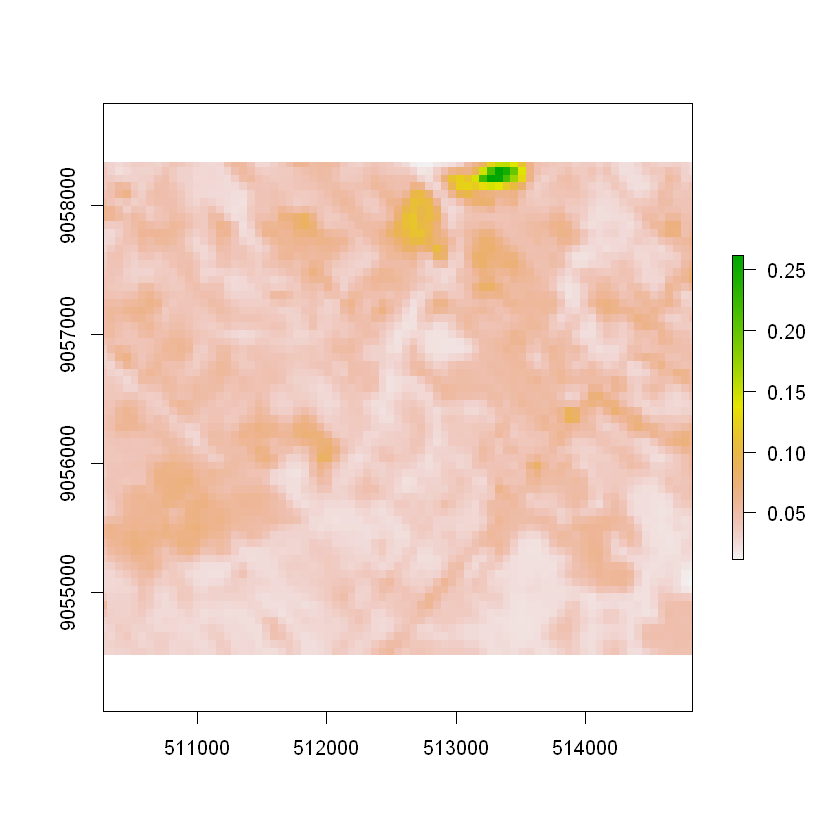

In [64]:
plot(RGB[[1]])

In [65]:
estimadores = datos_csv[,2]

In [66]:
estimadores

[1]  8.061165e+01  6.395323e+07 -6.395268e+07  2.350913e+02  3.756518e+01
 [6]  4.445986e+02  4.663607e+02 -1.538252e+01  4.568066e+07 -4.568079e+07
[11]  3.401823e+00  3.377727e-02 -5.872366e-01 -5.057964e+02 -5.676132e+02

In [67]:
length(estimadores)

[1] 15

In [68]:
Prediccion_variable = estimadores[1]*RGB[[1]]+estimadores[2]*RGB[[2]]+estimadores[3]*RGB[[3]]+  estimadores[4]*RGB[[4]]+estimadores[5]*RGB[[5]]+estimadores[6]*RGB[[6]]+ estimadores[7]*RGB[[7]]+estimadores[8]*RGB[[8]]+estimadores[9]*RGB[[9]]+estimadores[10]*RGB[[10]]+estimadores[11]*RGB[[11]]+estimadores[12]*RGB[[12]]+estimadores[13]*RGB[[13]]+estimadores[14]*RGB[[14]]+estimadores[15]*RGB[[15]]

In [596]:
#+estimadores[2]*RGB[[2]]+estimadores[3]*RGB[[3]]+  estimadores[4]*RGB[[4]]+estimadores[5]*RGB[[5]]+estimadores[6]*RGB[[6]]+ estimadores[7]*RGB[[7]]+estimadores[8]*RGB[[8]]+estimadores[9]*RGB[[9]]+estimadores[10]*RGB[[10]]+estimadores[11]*RGB[[11]]+estimadores[12]*RGB[[12]]

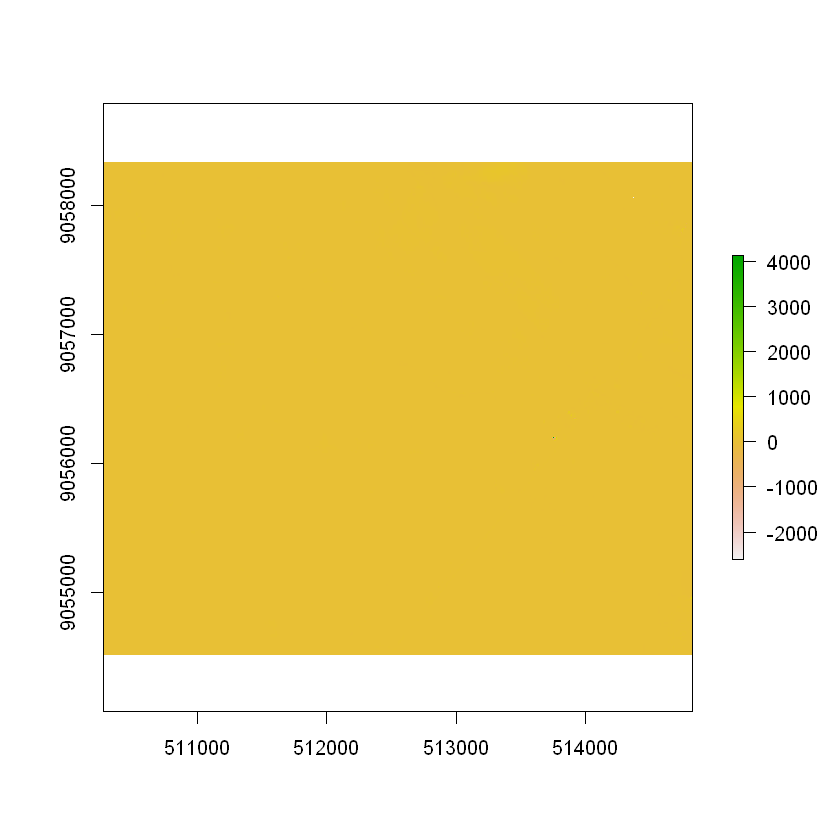

In [597]:
plot(Prediccion_variable)

In [598]:
EEA_Campo = shapefile(r"(C:\Users\AGPRES\Jupyter_Python\AGPRES\Datos_suelo\Shp\CE_Campo_Verde.shp)")

In [599]:
EEA_Campo_buffer <- st_buffer(st_geometry(st_as_sf(EEA_Campo)), dist = 30)

In [600]:
EEA_Campo_buffer_sp = as(EEA_Campo_buffer, Class = "Spatial")

In [601]:
Prediccion_variable_clip = mask(Prediccion_variable, EEA_Campo_buffer_sp)

In [602]:
carpeta_Raster_prediccion = paste(getwd(),"/","RASTER_PREDICCION",sep = "")
    if (!dir.exists(carpeta_Raster_prediccion)){
        dir.create(carpeta_Raster_prediccion)
    }else{
        print("Directorio existe RASTER_PREDICCION")
    }

[1] "Directorio existe RASTER_PREDICCION"


In [603]:
name_prediccion_tif = paste(carpeta_Raster_prediccion,"/Prediccion_",x_suelo,".tif",sep = "")
name_prediccion_tif

[1] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_Arcilla.tif"

In [604]:
writeRaster(Prediccion_variable_clip, name_prediccion_tif, drivername="Gtiff",overwrite=TRUE)

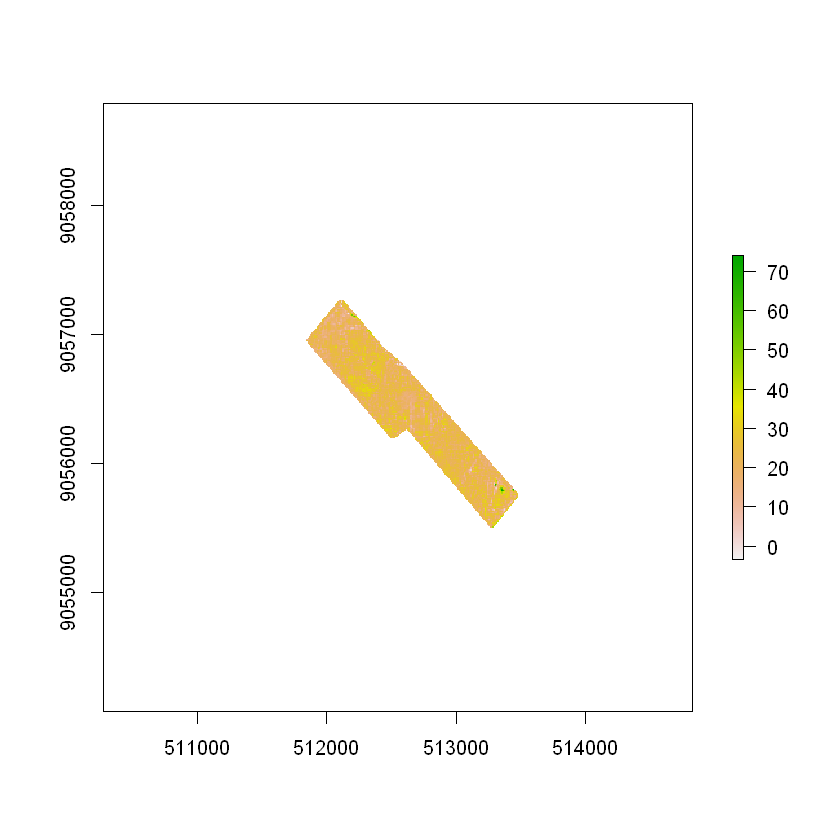

In [605]:
plot(Prediccion_variable_clip)